In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium as folium
from sklearn.cluster import KMeans

### Datasets

In [137]:
# utf-8 nao funcionou, foi usado ISO-8859-1 que cobre a maioria das línguas latinas e europeias
details_df = pd.read_csv('desafio_details.csv', encoding="ISO-8859-1", sep = ';')
ratings_df = pd.read_csv('desafio_ratings.csv', encoding="ISO-8859-1", sep = ';' )

In [138]:
details_df.head()

,Unnamed: 0,hotel_id,room_id,hotel_name,city_name,accommodation_type,room_name,room_surface_in_m2,room_facilities
0,0,10966441,1096644102,Apto belo e com churrasqueira na varanda VIC0203,Florianópolis,apartment,Apartamento,96.0,"['Taças de vinho', 'Secadora de roupas', 'Guar..."
1,1,10966258,1096625802,Chalés encantadores em Urubici/SC - PAR,Urubici,apartment,Bangalô,65.0,"['Banheiro privativo', 'Geladeira', 'TV', 'Sec..."
2,2,10966118,1096611801,Casa em lindo cond. a 5min da praia PEV105,Ubatuba,holiday_home,Casa de 3 Quartos,220.0,"['Taças de vinho', 'Cozinha', 'Vaso sanitário'..."
3,3,10961514,1096151402,Studio a 2min da UFSC Floripa-SC SSG0304,Florianópolis,apartment,Apartamento,51.0,"['Toalhas', 'Sofá-cama', 'Fogão', 'Chuveiro', ..."
4,4,10960702,1096070202,MGI - Apartamentos proximos da praia do Tororão,Arraial d'Ajuda,apartment,Villa Deluxe,130.0,"['Guarda-roupa ou armário', 'Área para refeiçõ..."


In [139]:
ratings_df.head()

,Unnamed: 0,hotel_id,hotel_name,url,Comodidades,Limpeza,Conforto,Custo-benefício,Localização,Total,WiFi gratuito,number_of_ratings
0,2,10966118,Casa em lindo cond. a 5min da praia PEV105,https://www.booking.com/hotel/br/casa-em-lindo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,5,10959776,Apartamentos no Jardim Goiás Goiânia/GO - THO,https://www.booking.com/hotel/br/apartamentos-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,6,10949139,Casa triplex em condomínio Floripa-SC ALI024,https://www.booking.com/hotel/br/casa-triplex-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,10948439,Apto com piscina no centro de Floripa PCE0406,https://www.booking.com/hotel/br/apto-com-pisc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,10,10943450,Apto espaçoso na beira do lago em Ilhéus ARS0169,https://www.booking.com/hotel/br/apto-espacoso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [140]:
# retorna o número de linhas e colunas
details_shp = details_df.shape
ratings_shp = ratings_df.shape

In [141]:
# quero saber se são valores unicos o hotel_id de cada dataset
details_uniq_id = details_df['hotel_id'].is_unique
ratings_uniq_id = ratings_df['hotel_id'].is_unique

In [142]:
# Imprimir os resultados
print("Detalhes do Dataset details:")
print("Número de linhas, colunas:", details_shp)
print("Mostra se são valores únicos  (hotel_id):", details_uniq_id)

print("\nDetalhes do Dataset ratings:")
print("Número de linhas, colunas:", ratings_shp)
print("Mostra se são valores únicos (hotel_id):", ratings_uniq_id)

Detalhes do Dataset details:
Número de linhas, colunas: (1317, 9)
Mostra se são valores únicos  (hotel_id): False

Detalhes do Dataset ratings:
Número de linhas, colunas: (713, 12)
Mostra se são valores únicos (hotel_id): True


### Pergunta 1
**Ordene as cidades em ordem crescente de número de listings.**
**Resposta:** As cidades foram ordenadas do menor para o maior número de anúncios. Florianópolis teve o maior número com 768 anúncios, enquanto várias cidades, como São José, Camboriú, Bertioga, entre outras, tiveram apenas 1 anúncio.

In [143]:
# Pergunta 1: Contando o número de listings por cidade
contagem_anuncios= details_df['city_name'].value_counts().sort_values()
contagem_anuncios = contagem_anuncios.reset_index()
contagem_anuncios.columns = ['cidade', 'qtd_listings']
contagem_anuncios.head()

,cidade,qtd_listings
0,São José,1
1,Camboriú,1
2,Bertioga,1
3,Meia Praia,1
4,Pirenópolis,1


C:\Users\isisd\AppData\Local\Temp\ipykernel_6024\1238596088.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'qtd_listings', y='cidade', data=top_10_cidades_listings,palette='viridis')


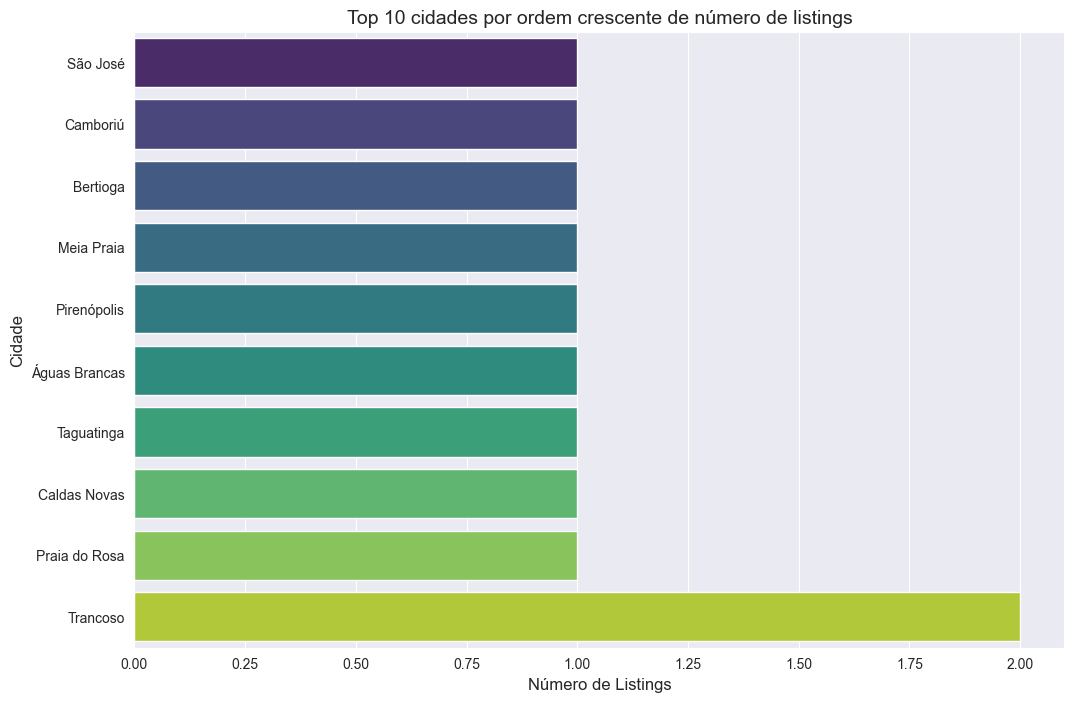

In [144]:
# Selecionando as 10 primeiras cidades
top_10_cidades_listings = contagem_anuncios.head(10)

# Criando um gráfico de barras com Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x= 'qtd_listings', y='cidade', data=top_10_cidades_listings,palette='viridis')

# Adicionando título e labels
plt.title('Top 10 cidades por ordem crescente de número de listings', fontsize=14)
plt.xlabel('Número de Listings', fontsize=12)
plt.ylabel('Cidade', fontsize=12)

# Mostrando o gráfico
plt.show()

### Pergunta 2
**Ordene as cidades em ordem decrescente de metros quadrados.**
**Resposta:** Florianópolis liderou com a maior soma de metros quadrados (49.473,22 m²), enquanto cidades como Águas Brancas apresentara 30 m² e Camboriú apresenta 43 m².

In [145]:
# Pergunta 2: Calculando a soma total de metros quadrados por cidade
soma_area_cidades = details_df[details_df['room_surface_in_m2'] > 5].groupby('city_name')['room_surface_in_m2'].sum().sort_values(ascending=False)

# Visualizando
soma_area_cidades = soma_area_cidades.reset_index()
soma_area_cidades.columns = ['cidade', 'media_m²']
soma_area_cidades.head()

,cidade,media_m²
0,Florianópolis,49458.22
1,Goiânia,5342.00
2,Bombinhas,4247.00
3,Balneário Camboriú,4023.80
4,Itapema,2553.80


C:\Users\isisd\AppData\Local\Temp\ipykernel_6024\1402021927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot  = sns.barplot(x= 'media_m²', y='cidade', data = top_10_cidades_metros,palette='viridis')


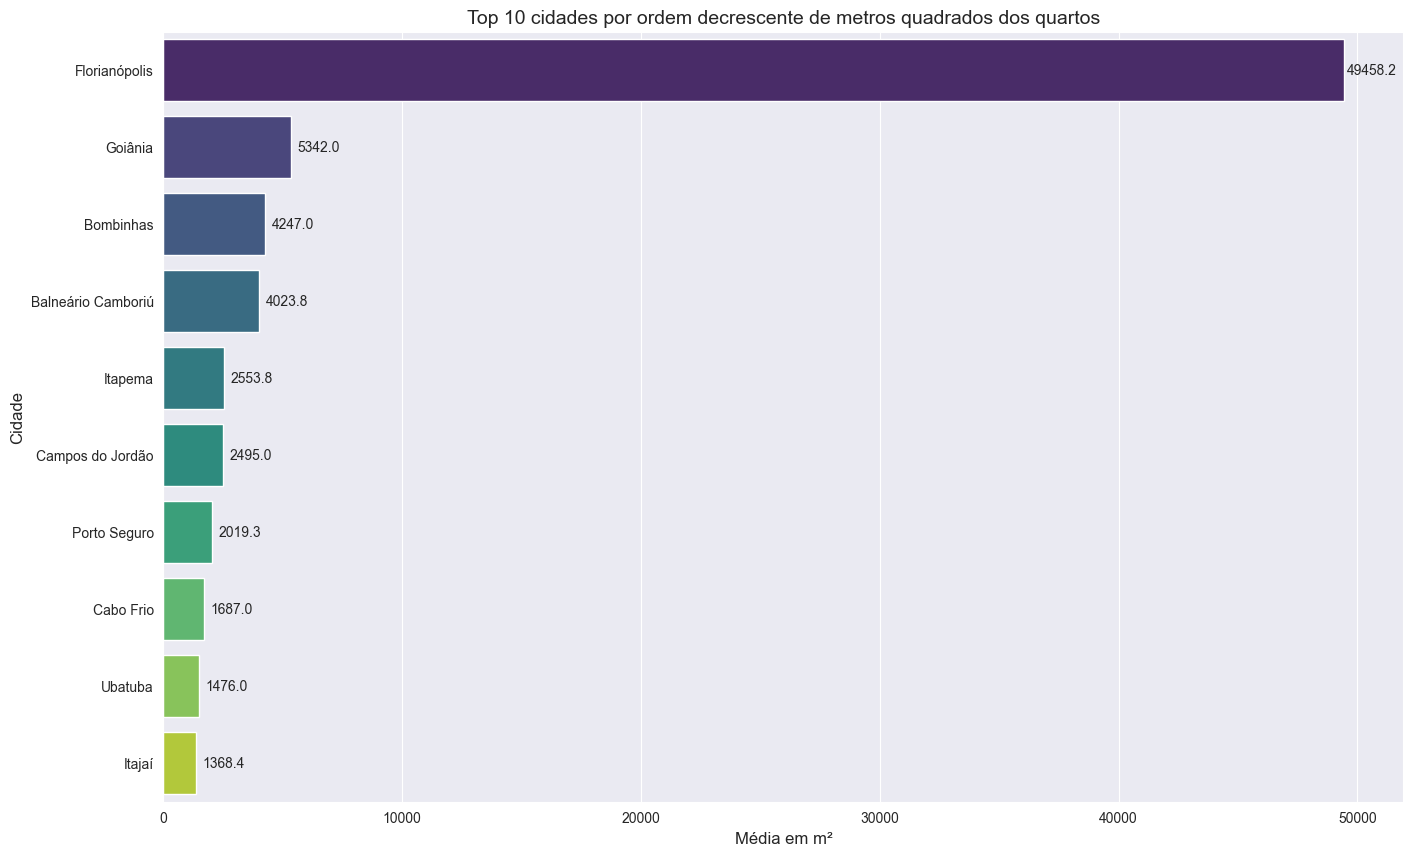

In [146]:
# Selecionando as 10 primeiras cidades
top_10_cidades_metros = soma_area_cidades.head(10)

# Criando um gráfico de barras com Seaborn
plt.figure(figsize=(16, 10))
barplot  = sns.barplot(x= 'media_m²', y='cidade', data = top_10_cidades_metros,palette='viridis')

# Adicionando título e labels
plt.title('Top 10 cidades por ordem decrescente de metros quadrados dos quartos', fontsize=14)
plt.xlabel('Média em m²', fontsize=12)
plt.ylabel('Cidade', fontsize=12)

# Adicione os números nas barras
for bar in barplot.patches:
    barplot.annotate(format(bar.get_width(), '.1f'),
                     (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     ha='center',
                     va='center',
                     size=10,
                     xytext=(20, 0),
                     textcoords='offset points')

# Mostrando o gráfico
plt.show()

### Pergunta 3
**Quais cidades têm mais avaliações?**
**Resposta:** Florianópolis teve o maior número de avaliações (87.353), seguida por Anitápolis e Campos do Jordão. Muitas cidades tiveram 0 avaliações.

In [147]:
merged_df = pd.merge(details_df, ratings_df, on='hotel_id', how='left', suffixes=('_details', '_ratings'))

In [148]:
# Pergunta 3: Somando o número total de avaliações por cidade
total_notas_cidades = merged_df.groupby('city_name')['number_of_ratings'].sum().sort_values(ascending=False)
total_notas_cidades

city_name
Florianópolis          87353.0
Anitápolis              2106.0
Campos do Jordão        1815.0
Bombinhas               1126.0
Goiânia                  531.0
Balneário Camboriú        54.0
Itajaí                    23.0
Itapema                   19.0
Gramado                   15.0
Ubatuba                   15.0
Porto Belo                 8.0
Petrópolis                 8.0
Canela                     6.0
Brasília                   6.0
São José                   6.0
Porto Alegre               5.0
Cabo Frio                  4.0
Ilhéus                     3.0
Garopaba                   3.0
Poços de Caldas            3.0
Camboriú                   1.0
Urubici                    1.0
Angra dos Reis             1.0
Taguatinga                 0.0
Trancoso                   0.0
Santa Cruz Cabrália        0.0
Praia do Rosa              0.0
Águas Brancas              0.0
Imbituba                   0.0
Porto Seguro               0.0
Pirenópolis                0.0
Meia Praia                 0.

### Pergunta 4
**Quais cidades têm a maior e a menor média de avaliações? Existe alguma explicação para isso?**
**Resposta:** Camboriú teve a menor média de avaliações (1.0), e Ilhéus, Angra dos Reis e Brasília as maiores (10.0). A variação nas médias pode ser influenciada por fatores como número de avaliações, qualidade dos serviços e atrações turísticas. Mas parece que destinos mais proximas do litoral tem maiores medias de avaliacao.

In [149]:
#primeiro, filtro o dataset para que o Total>0, pois se nao tem avaliacao, nao podemos iniciamente inferir algo
cid_media = merged_df[merged_df['Total'] > 0]
cid_media = cid_media.groupby('city_name')['Total'].mean()
cid_media = cid_media.reset_index()
cid_media.columns = ['cidade', 'media_avaliacao']
cid_media

,cidade,media_avaliacao
0,Angra dos Reis,10.000000
1,Anitápolis,9.400000
2,Balneário Camboriú,8.150000
3,Bombinhas,8.867647
4,Brasília,10.000000
5,Cabo Frio,9.500000
6,Camboriú,1.000000
7,Campos do Jordão,9.100000
8,Canela,9.000000
9,Florianópolis,8.782000


In [150]:
geolocator = Nominatim(user_agent="geoapiExercises")

# Função para obter latitude e longitude
def get_lat_lon(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

cid_media['latitude'], cid_media['longitude'] = zip(*cid_media['cidade'].apply(get_lat_lon))


print(cid_media.head())

               cidade  media_avaliacao   latitude  longitude
0      Angra dos Reis        10.000000 -23.006397 -44.316326
1          Anitápolis         9.400000 -27.904118 -49.128740
2  Balneário Camboriú         8.150000 -26.992439 -48.633978
3           Bombinhas         8.867647 -27.151916 -48.487569
4            Brasília        10.000000 -10.333333 -53.200000


In [151]:
# Criando o mapa
mapa = folium.Map(location=[-15.788497, -47.879873], zoom_start=4)
# Filtrando os dados
menor_que_8 = cid_media[(cid_media['media_avaliacao'] > 0) &(cid_media['media_avaliacao'] <= 8)]
maior_que_8 = cid_media[(cid_media['media_avaliacao'] > 0) &(cid_media['media_avaliacao'] >= 8)]

# Adicionando marcadores
for index, row in menor_que_8.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"{row['cidade']}: {row['media_avaliacao']:.2f}",
        icon=folium.Icon(color='red')
    ).add_to(mapa)

for index, row in maior_que_8.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"{row['cidade']}: {row['media_avaliacao']:.2f}",
        icon=folium.Icon(color='green')
    ).add_to(mapa)
mapa.save('mapa.html')
# Exibindo o mapa
mapa

### Pergunta 5
**Existem correlações entre as características de um anúncio e sua localização? Quais? Explique.**
**Resposta:** As análises indicaram correlações muito baixas entre a localização da cidade, o tipo de acomodação, a superfície do quarto e a nota total. Isso sugere que essas características não estão fortemente relacionadas com a localização geográfica. Correlação Moderada entre Localização e Limpeza: A coluna Localização tem uma correlação positiva moderada com Limpeza. Isso sugere que as acomodações localizadas em determinadas áreas podem ser percebidas como mais limpas, o que pode estar relacionado a padrões de higiene específicos de determinadas regiões ou à percepção dos hóspedes sobre diferentes áreas.


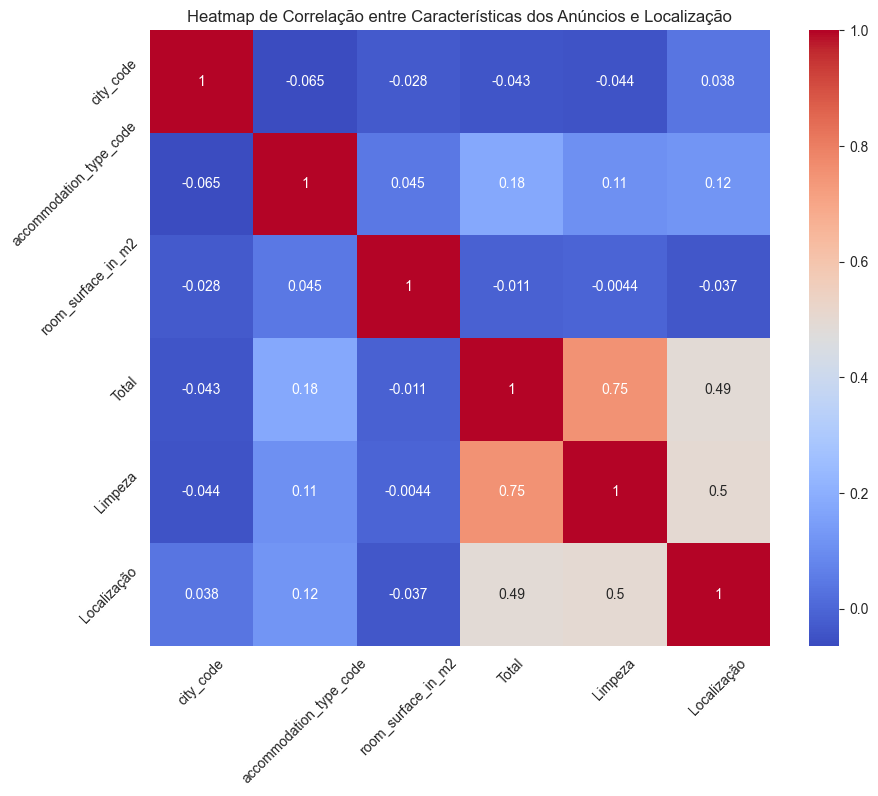

In [152]:
merged_df['city_code'] = pd.Categorical(merged_df['city_name']).codes
merged_df['accommodation_type_code'] = pd.Categorical(merged_df['accommodation_type']).codes

# Selecionando as colunas relevantes
df_analise = merged_df[['city_code', 'accommodation_type_code', 'room_surface_in_m2', 'Total','Limpeza', 'Localização']]

# Calculando a correlação
correlacao = df_analise.corr()

# Gerando o gráfico da matriz de correlação
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação entre Características dos Anúncios e Localização')

# Ajustando as legendas dos eixos
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

plt.show()

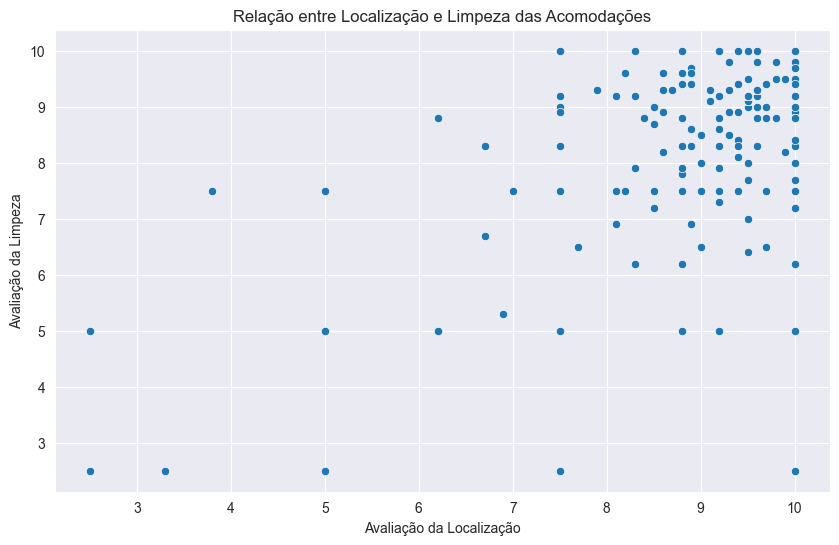

In [153]:
# Filtrando as colunas relevantes para análise
relevant_data = merged_df[['Localização', 'Limpeza']]

# Removendo linhas com valores faltantes para análise mais precisa
cleaned_data = relevant_data.dropna()

# Criando um gráfico de dispersão para visualizar a relação entre Localização e Limpeza
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Localização', y='Limpeza', data=cleaned_data)
plt.title('Relação entre Localização e Limpeza das Acomodações')
plt.xlabel('Avaliação da Localização')
plt.ylabel('Avaliação da Limpeza')
plt.show()

### Pergunta 6
**Existem relações entre a nota do anúncio e os recursos disponíveis no imóvel? Quais? Explique.**
**Resposta:** Algumas comodidades parecem ter um efeito positivo nas avaliações dos hóspedes, mas essa influência varia e não é consistente em todas as categorias de avaliação. É interessante realizar uma análise mais aprofundada.

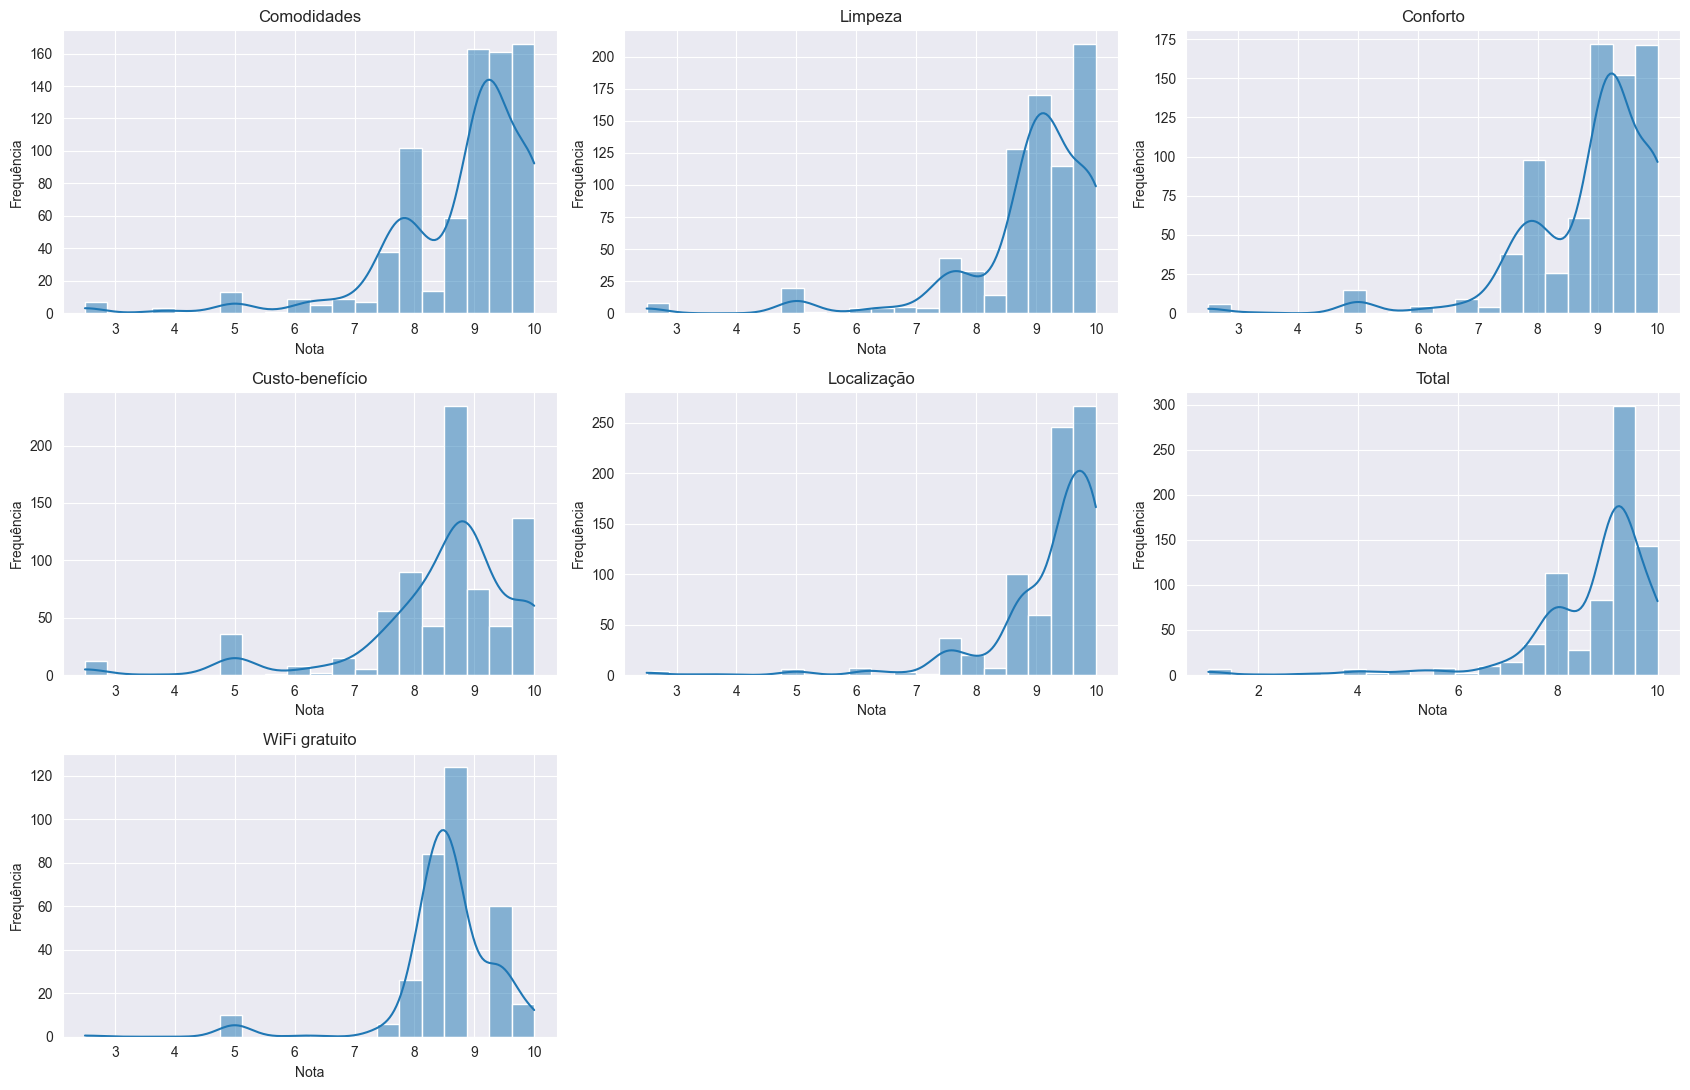

In [154]:
rating_columns = ['Comodidades', 'Limpeza', 'Conforto', 'Custo-benefício', 'Localização', 'Total', 'WiFi gratuito']

# Plotando a distribuição das notas de avaliação
plt.figure(figsize=(17, 11))
for i, column in enumerate(rating_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(merged_df[column], bins=20, kde=True)
    plt.title(column)
    plt.xlabel('Nota')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Pergunta 7
**Existe alguma relação entre a nota recebida e a localização? Quais? Explique.**
**Resposta:** Existe uma correlação moderada, indicando que: embora a localização seja um fator relevante na determinação da nota geral de uma acomodação, ela não é o único fator decisivo. Outros aspectos, como as comodidades, a limpeza e o conforto, também desempenham papéis importantes na avaliação geral.

In [155]:
corr_localiz = merged_df[['Total', 'Localização']].corr()

corr_localiz

,Total,Localização
Total,1.00000,0.49172
Localização,0.49172,1.00000


### Pergunta 8
**O que você pode inferir sobre as notas dos imóveis?**

**Resposta:**
#### Estatísticas descritivas

- **Quantidade de Avaliações:** Temos um total de 759 avaliações em nosso conjunto de dados.
- **Média das Notas:** A média das notas é de aproximadamente 8.71, o que sugere que, em geral, as avaliações tendem a ser positivas.
- **Variação das Notas:** O desvio padrão é cerca de 1.36, indicando uma moderada variação nas notas.
- **Mínimo e Máximo das Notas:** As notas variam de 1 a 10, o que está de acordo com um sistema de avaliação de 1 a 10.
- **Quartis:** 25% das notas são iguais ou inferiores a 8.0, 50% (a mediana) são iguais ou inferiores a 9.1, e 75% são iguais ou inferiores a 9.4. Isso indica que a maioria das avaliações se concentra no espectro mais elevado.

## Histograma das Notas

O histograma nos mostra como as notas dos imóveis estão distribuídas. Observamos uma concentração de notas elevadas, próximas a 9 e 10, o que sugere que a maioria dos imóveis recebe avaliações positivas. A distribuição é ligeiramente inclinada para a esquerda, com menos imóveis recebendo notas mais baixas.

## Conclusão

Com base nas informações apresentadas, podemos concluir que, de modo geral, os imóveis têm sido bem avaliados pelos hóspedes. A predominância de notas mais altas indica uma satisfação geral com as acomodações oferecidas. A mediana acima de 9 sugere que a maioria dos hóspedes está bastante satisfeita com os imóveis


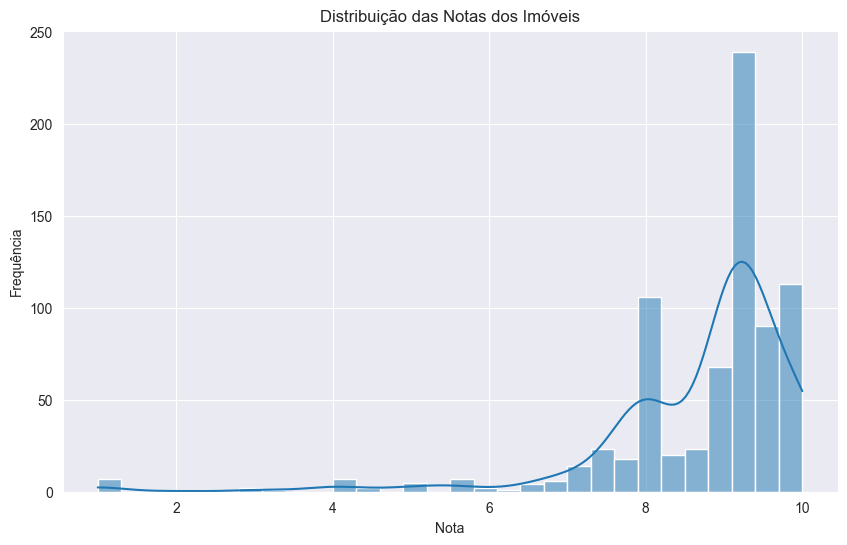

count    759.000000
mean       8.710013
std        1.356361
min        1.000000
25%        8.000000
50%        9.100000
75%        9.400000
max       10.000000
Name: Total, dtype: float64

In [156]:
# Calculando estatísticas básicas para a coluna de notas (Total)
notas_estatisticas = merged_df['Total'].describe()

# Criando um histograma para a distribuição das notas
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Total'], kde=True)
plt.title('Distribuição das Notas dos Imóveis')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

notas_estatisticas

### Pergunta 9
**Quais são os anúncios que parecem críticos? Explique.**
**Resposta:**
- **Áreas com Problemas:** Os anúncios críticos tendem a ter problemas principalmente nas áreas de limpeza e conforto.
- **Localização Bem Avaliada:** É interessante observar que a localização é geralmente bem avaliada, mesmo nos anúncios com notas gerais mais baixas.
- **Tipo de Imóvel:** A maioria desses anúncios críticos são apartamentos, especialmente em cidades como Florianópolis e Goiânia.

## Implicações

Essas informações podem ser úteis para os proprietários desses imóveis focarem em melhorias específicas, principalmente em limpeza e conforto, para elevar suas avaliações gerais. Melhorias nessas áreas podem ajudar a melhorar a satisfação dos hóspedes e, consequentemente, suas avaliações e classificações.

In [157]:
# Identificando anúncios com notas de avaliação geral (Total) abaixo da média
media_notas_total = merged_df['Total'].mean()
anuncios_criticos = merged_df[merged_df['Total'] < media_notas_total]

# Examinando categorias específicas de avaliação para esses anúncios
categorias_criticas = ['Limpeza', 'Conforto', 'Localização']
analise_categorias = anuncios_criticos[categorias_criticas].describe()

# Identificando padrões comuns (como tipo de acomodação, localização)
padroes_comuns = anuncios_criticos[['accommodation_type', 'city_name']].value_counts()

analise_categorias, padroes_comuns.head() 


(          Limpeza    Conforto  Localização
 count  249.000000  249.000000   249.000000
 mean     7.940161    7.797590     8.847390
 std      1.521404    1.384387     1.479948
 min      2.500000    2.500000     2.500000
 25%      7.500000    7.500000     8.500000
 50%      8.500000    7.900000     9.300000
 75%      8.800000    8.800000     9.800000
 max     10.000000   10.000000    10.000000,
 accommodation_type  city_name    
 apartment           Florianópolis    94
                     Goiânia          84
 holiday_home        Florianópolis    18
 hotel               Florianópolis    11
 guest_house         Bombinhas        11
 Name: count, dtype: int64)

### Pergunta 10
**Quais outras análises você faria desses dados? Use sua criatividade.**
**Resposta:**  
Neste cluster, encontramos imóveis com quartos muito espaçosos. Uma característica notável é o tamanho generoso dessas acomodações, o que pode torná-las mais caras em comparação com outros imóveis.

No entanto, as avaliações deste grupo são relativamente mais baixas. Isso sugere que, apesar do espaço amplo oferecido, os hóspedes podem não estar tão satisfeitos em comparação com os imóveis de outros clusters.

C:\Users\isisd\DataspellProjects\seazone\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\isisd\DataspellProjects\seazone\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\isisd\DataspellProjects\seazone\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\isisd\DataspellProjects\seazone\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

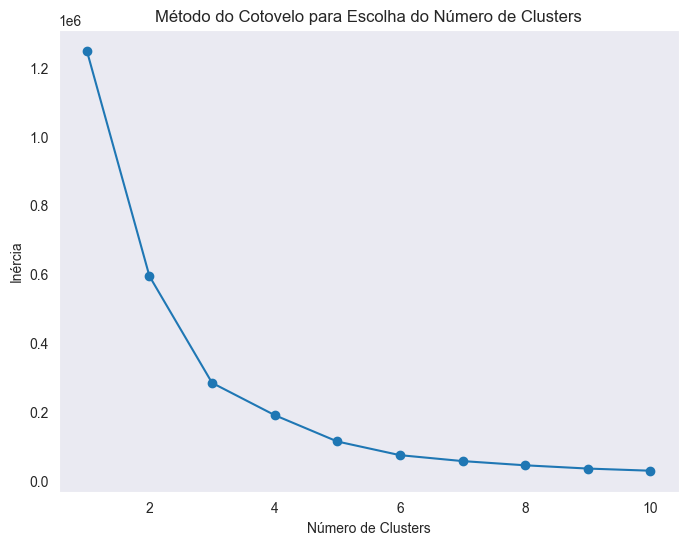

C:\Users\isisd\DataspellProjects\seazone\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


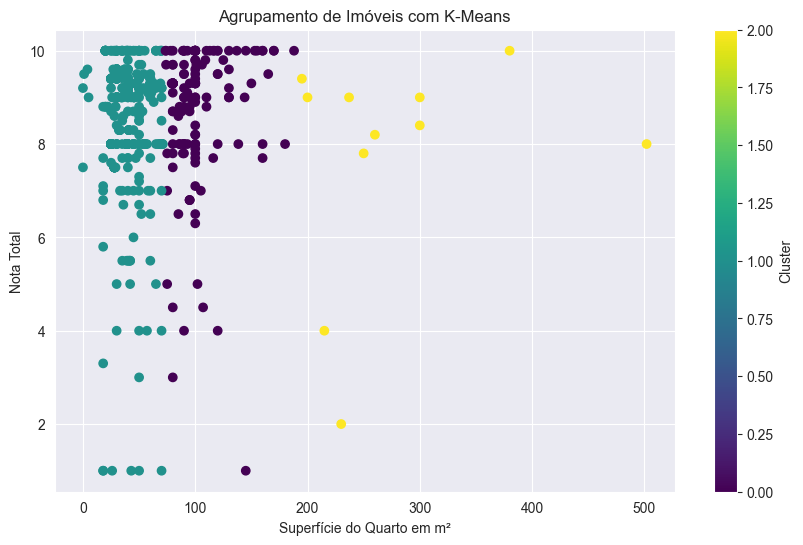

,room_surface_in_m2,Total
Cluster,,
0,101.906424,8.746358
1,42.399876,8.701413
2,279.000000,7.709091


In [158]:
features = merged_df[['room_surface_in_m2', 'Total']].dropna()

inertia = []

#vou selecionar a quantidade de clusters de acordo com a regra do cotovelo
n_clusters_range = range(1, 11)
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plote o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolha do Número de Clusters')
plt.grid()
plt.show()

chosen_n_clusters = 3  # Substitui pela qtd mostrada na curva do cotovelo.

kmeans = KMeans(n_clusters=chosen_n_clusters, random_state=0).fit(features)

features['Cluster'] = kmeans.labels_

# Plotar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(features['room_surface_in_m2'], features['Total'], c=features['Cluster'], cmap='viridis')
plt.xlabel('Superfície do Quarto em m²')
plt.ylabel('Nota Total')
plt.title('Agrupamento de Imóveis com K-Means')
plt.colorbar(label='Cluster')
plt.show()

features.groupby('Cluster').mean()


### Pergunta 11
**Como você projetaria um dashboard para mostrar essas informações?**
**Resposta:** 
### Distribuição de Notas por Cidade

- Um gráfico de barras interativo mostraria a distribuição das notas de avaliação para cada cidade. Poderia selecionar uma cidade específica e ver como as avaliações são distribuídas nessa localização.

### Distribuição de Notas por Tipo de Acomodação

- Um gráfico de barras empilhadas permitiria que os que fosse explorado como as notas variam entre diferentes tipos de acomodação, como apartamentos, casas, hotéis, etc.

### Distribuição de Notas por Tamanho do Imóvel

- Um gráfico de histograma interativo exibiria a distribuição das notas com base no tamanho do imóvel em metros quadrados. 

### Análise Temporal

- Um gráfico de linha interativo representaria a tendência das avaliações ao longo do tempo. Poderiam selecionar um período específico e analisar as mudanças nas notas.

### Mapa de Calor de Avaliações

- Um mapa interativo de calor mostraria visualmente as áreas mais populares e as menos populares com base nas avaliações dos hóspedes. As cores mais quentes indicariam áreas com avaliações mais altas.

### Feedback dos Hóspedes

- Um gráfico de dispersão interativo permitiria que os usuários explorassem o feedback dos hóspedes em relação a diferentes aspectos, como limpeza, conforto, serviço, etc., para identificar áreas de força e fraqueza.

A inclusão desses gráficos interativos tornaria o dashboard uma ferramenta poderosa para a análise de dados de avaliações, oferecendo insights valiosos de maneira visual e intuitiva.

### Pergunta 12
**Quais outras informações/dados você relacionaria com essas bases caso tivesse acesso?**

**Resposta:** 

- **Dados Temporais:** A inclusão das datas das avaliações nos permitiria examinar tendências sazonais e mudanças de longo prazo na qualidade dos imóveis.

- **Informações de Preço:** Analisar os preços em relação às avaliações ajudaria a entender a percepção de valor dos hóspedes e a relação preço-qualidade.

- **Dados Demográficos dos Hóspedes:** Compreender quem são nossos hóspedes e suas preferências nos ajudaria a personalizar serviços e aprimorar a experiência do cliente.

- **Taxas de Ocupação e Histórico de Manutenção:** Esses dados nos permitiriam correlacionar a demanda e as condições dos imóveis com as avaliações, identificando como diferentes fatores influenciam a satisfação do hóspede


### Pergunta 13
**(Extra) Com base nesses dados e nos anúncios fornecidos, como você melhoraria as notas?**
**Resposta:**
1. **Identificação de Áreas para Melhoria:** Primeiramente, identificaria áreas específicas para melhorias com base nas avaliações recebidas. Focaria em aspectos como comodidades, serviço ao cliente e limpeza, que são fundamentais para a satisfação dos hóspedes.

2. **Implementação de Melhorias Direcionadas:** Implementaria melhorias direcionadas nessas áreas identificadas. Trabalharia para aprimorar a qualidade das comodidades oferecidas, treinar a equipe de atendimento ao cliente e elevar os padrões de limpeza e manutenção.

3. **Destaque dos Pontos Fortes:** Utilizaria os anúncios para destacar os pontos fortes de cada hotel. Criaria uma imagem positiva realçando as melhorias feitas e as características exclusivas que tornam cada hotel especial.

4. **Resposta Construtiva aos Feedbacks:** Enfatizaria a importância de responder aos feedbacks dos clientes de forma construtiva e proativa. Isso demonstraria nosso compromisso com a excelência e o aprimoramento contínuo.
